In [1]:
########################################
###  코드작성 [메모리 변수 모두 제거
#######################################
all = [var for var in globals() if var[0] != "_"]
for var in all:
    del globals()[var]

In [2]:
# 필요 라이브러리 로드
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform

##[미션] wine의 데이터셋이해
- 레드와인(껍질 O)과 화이트 와인(껍질 x)의 alcohol, sugar, PHP의 관계 조사
- 이 자료의 class가 1이면 화이트 화인/0이면 레드와인임
 - alcohol: 도수
 - sugar: 당류
 - PH: 수소 이온 농도(pH)는 물질의 산성과 알칼리성 정도를 나타내는 수치이다.

In [10]:
########################################
###  wine1=wine1.csv  
###  wine2=wine2.csv
#######################################
wine1 = pd.read_csv('wine1.csv',sep = '\t')
wine2 = pd.read_csv('wine2.csv',sep = '\t')

In [8]:
## 다른 방법
from glob import glob
pd.read_csv(glob('w*')[1],sep='\t')

,index,alcohol,class
0,7001,9.90,999.0
1,1,9.40,0.0
2,2,9.80,0.0
3,3,9.99,999.0
4,6498,9.80,0.0
...,...,...,...
6495,6493,11.20,1.0
6496,6494,9.60,1.0
6497,6495,9.40,1.0
6498,6496,12.80,1.0


In [16]:
########################################
### [두자료의 교집합 자료만 보기] 데이콘 경진대회 교재 P16 참조
###  wine1과 wine2의 index 필드값이 같은 자료만 가져오기
### 최종 wine 변수에 할당
wine = pd.merge(wine1,wine2, left_on='index', right_on='index')

# index별로 정렬
wine = wine.sort_values(by = 'index').reset_index(drop=True)
### wine자료와 wine2 자료를  연결하여서
### wine의 index번호에 해당하는
### wine2자료의 sugar_PH값 가져와  df 데이터셋 제작 -----까지 해결

In [ ]:
## 강사님 코드 ##
# 새로운 인덱스의 교집합

intersection_idx = list(set(wine1['index']).intersection(wine2['index']))


# 교집합에 존재하는 데이터만 불러오기
wine = wine1.loc[
    wine1['index'].apply(lambda x: x in intersection_idx)].copy()

wine = wine.sort_values(by = 'index').reset_index(drop=True) 
wine['class'].min(), wine['class'].max()

print(wine.info())
print(wine.head(20))


In [17]:
### wine['class']의 최대값1, 최소값 0 확인 (max, min 함수로 출력)
wine['class'].max(),wine['class'].min()

(1.0, 0.0)

In [18]:
### df 데이터셋의 sugar_PH의  값 분리하여
### df['sugar']   df['PH'] 변수로 작성
df = wine
df['sugar'] = df['sugar_PH'].str.split('/').str[0]
df['PH'] = df['sugar_PH'].str.split('/').str[1]

In [ ]:
## 강사님 ##
# ★★★★★★★ [미션] ★★★★★★★
########################################
### wine자료와 wine2 자료를  연결하여서
### wine의 index번호에 해당하는
### wine2자료의 sugar_PH값 가져와  df 데이터셋 제작
### df 데이터셋의 sugar_PH의  값 분리하여
### df['sugar']   df['PH'] 변수로 작성
#######################################


## merge 로 두데이터 조인
df=pd.merge(wine, wine2)

##### 방법 3
# 파이썬 컴프리헨션(압축기법)
df['sugar']=[x.split('/')[0] if pd.notnull(x) else x for x in tmp['sugar_PH']]

df['sugar'] = df['sugar_PH'].apply(
    lambda x: x.split('/')[0] if pd.notnull(x) else x)

df['PH'] = df['sugar_PH'].apply(
    lambda x: x.split('/')[1] if pd.notnull(x) else x)

dfTmp=pd.merge(wine1,wine2)
dataList=[]; mainList=[]

for i in dfTmp['sugar_PH']:
  List=[]
  for j in i.split('/'):
    List.append(j)
  mainList.append(List)
print(mainList[:10])


In [15]:
df

,index,alcohol,class,sugar_PH,sugar,PH
0,1,9.4,0.0,1.9/3.51,1.9,3.51
1,2,9.8,0.0,2.6/3.2,2.6,3.2
2,6498,9.8,0.0,2.3/3.26,2.3,3.26
3,4,9.8,0.0,1.9/3.16,1.9,3.16
4,5,9.4,0.0,1.9/3.51,1.9,3.51
...,...,...,...,...,...,...
6492,6493,11.2,1.0,1.6/3.27,1.6,3.27
6493,6494,9.6,1.0,8/3.15,8,3.15
6494,6495,9.4,1.0,1.2/2.99,1.2,2.99
6495,6496,12.8,1.0,1.1/3.34,1.1,3.34


In [22]:
########################################
### df의 각 필드 타입 확인 및 데이터 갯수 확인
########################################
df.isna().sum()


index       0
alcohol     0
class       4
sugar_PH    0
sugar       0
PH          0
dtype: int64

In [51]:
df = df.drop(['sugar_PH'],axis=1)

KeyError: ignored

In [73]:
########################################
### sugar, PH의 필드형식 float64로 변환
#######################################
df = df.astype({'sugar': 'float64'})
df = df.astype({'PH': 'float64'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     6497 non-null   int64  
 1   alcohol   6497 non-null   float64
 2   class     6493 non-null   float64
 3   sugar_PH  6497 non-null   object 
 4   sugar     6497 non-null   float64
 5   PH        6497 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 304.7+ KB


In [45]:
## 다른 방법
for x in df.columns:
  if df[x].dtype == 'object':
    df[x]= df[x].astype('float64')

In [27]:
## 다른방법
[df[x].astype('float64') if df[x].dtype == 'object' else x for x in df.columns]
## else를 쓰지않으려면
[df[x].astype('float64') for x in df.columns if df[x].dtype == 'object']

['index', 'alcohol', 'class', 0       1.9
 1       2.6
 2       1.9
 3       1.9
 4       1.8
        ... 
 6492    1.2
 6493    1.1
 6494    0.8
 6495    2.3
 6496    6.1
 Name: sugar, Length: 6497, dtype: float64, 0       3.51
 1       3.20
 2       3.16
 3       3.51
 4       3.51
         ... 
 6492    2.99
 6493    3.34
 6494    3.26
 6495    3.26
 6496    3.35
 Name: PH, Length: 6497, dtype: float64]

In [44]:
########################################
### [두자료의 교집합 자료만 보기] 데이콘 경진대회 교재 P37 참조
### 숫자값 필드 결측치 0으로 치환
#######################################
df = df.fillna(0)
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

#  결측치를 0으로 채우기
df[df.select_dtypes(include=numerics).columns] =df[df.select_dtypes(include=numerics).columns].fillna(0)
df.info()

# for문 이용
for x in df.columns:
  if df[x].dtype in ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']:
    df[x].fillna(0)
#
# df[x].fillna(0) for x in df.columns if df[x].dtype in ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] ]
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    6497 non-null   int64  
 1   alcohol  6497 non-null   float64
 2   class    6497 non-null   float64
 3   sugar    6497 non-null   object 
 4   PH       6497 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 253.9+ KB


In [31]:
[df[x].fillna(0) for x in df.columns if df[x].dtype in ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']]

[0          1
 1          2
 2          4
 3          5
 4          6
         ... 
 6492    6495
 6493    6496
 6494    6497
 6495    6498
 6496    6499
 Name: index, Length: 6497, dtype: int64, 0        9.4
 1        9.8
 2        9.8
 3        9.4
 4        9.4
         ... 
 6492     9.4
 6493    12.8
 6494    11.8
 6495     9.8
 6496    10.5
 Name: alcohol, Length: 6497, dtype: float64, 0       0.0
 1       0.0
 2       0.0
 3       0.0
 4       0.0
        ... 
 6492    1.0
 6493    1.0
 6494    1.0
 6495    0.0
 6496    0.0
 Name: class, Length: 6497, dtype: float64]

In [52]:
df = df.drop(['index'],axis=1)

In [53]:
# x,y 데이터 분할
y_data = df['class']
X_data = df.drop(['class'],axis=1)
X_data
X_data.head()

,alcohol,sugar,PH
0,9.4,1.9,3.51
1,9.8,2.6,3.20
2,9.8,1.9,3.16
3,9.4,1.9,3.51
4,9.4,1.8,3.51


In [54]:
#사이킷런 제공 트레이닝 테스트 자료 본할기 사용
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score, roc_curve


train_x, test_x ,train_y, test_y = train_test_split(X_data, y_data, test_size=0.3,random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)


(4547, 3) (1950, 3) (4547,) (1950,)


In [55]:
## 사이킷런의 standardscaler를 이용하여서 train,test 의 x자료 스케일링
# 스케일링된 변수 train_scaled / test_scaled 생성

scaler = StandardScaler()
scaler.fit(train_x)

train_scaled = scaler.transform(train_x)
test_scaled = scaler.transform(test_x)

In [56]:
train_x

,alcohol,sugar,PH
863,9.7,2.6,3.51
104,9.3,1.7,3.08
1764,12.6,2.4,3.08
1691,11.5,1.7,3.21
1344,11.4,2.1,3.52
...,...,...,...
905,11.5,2.2,3.59
5192,12.1,1.0,3.12
3980,11.0,5.8,3.28
235,9.2,1.9,3.37


In [57]:
## 우리는 y결과값이 3과1의 두가지 값만 표시되는 이항분류를 진행하고자 함
## 로지스틱 회귀 분석 실시
### 트레이닝, 테스트 스코어 값

lr = LogisticRegression()
lr.fit(train_scaled, train_y)

print(lr.score(train_scaled,train_y))
print(lr.score(test_scaled,test_y))

0.7849131295359578
0.782051282051282


In [68]:
pred = lr.predict(test_scaled)
print('acc 정확도 %2.3f'%accuracy_score(test_y,pred))
print('acc 정밀도 %2.3f'%precision_score(test_y,pred))
print('rec 재현율 %2.3f'%recall_score(test_y,pred))

acc 정확도 0.782
acc 정밀도 0.823
rec 재현율 0.909


In [74]:
# pred - test_y 값이 0이면 맞음, 아니면 틀림
cnt=0
for i,j in zip(pred, test_y):
  if i == j:
    cnt+=1
print(cnt/len(pred),1-cnt/len(pred))
# 정확도 (성공률): 맞음갯수/전체갯수

#----------------------------------
cnt1 = 0
for x in pred-test_y:
  if x==0:
    cnt1+=1
print(cnt1/len(pred))


#----------------------------------
tmp=[]
for x in pred-test_y:
  tmp.append(x)
print(tmp.count(0)/len(tmp))


#----------------------------------
tmp=[x for x in pred-test_y]
print(tmp.count(0)/len(tmp))

0.782051282051282 0.21794871794871795
0.782051282051282
0.782051282051282
0.782051282051282


In [78]:
## 참고 예측
# 새로운 new_X값도 스케일링 하고 예측해야함.
# alcohol,sugar, PH값이

# new_X는 사용자가 웹에서 직접 입력할 수도 있고, 크롤링으로 얻어온 자료일 수 있고
# 또는 이미지 또는 사운드의 내용일 수 있음.

# 이 작업은 보통, 위에 있는 작업을 모두 피클링 또는 dump해서 객체화 시켜서 갖고 있게 됨.

# 또는 머신러닝에서도 모델값만 갖고 있게 됨.
# 또는 딥러닝 같은 경우는 모델 값만 갖고 있게 됨
new_X=np.array([[15,30,1.08]])
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
#scaler.fit(new_X)
newX_scaled = scaler.transform(new_X)
y_hat = lr.predict(newX_scaled)
# 이 자료의 class 가 1 이면 화이트와인 /0이면 레드와인
classLabel=['red wine','white wine']
print(classLabel[int(y_hat[0])])

# 
확률 = lr.predict_proba(new_X)    # 출력물이 [0.,1.] 1이 될 확률이 1이다.
classLabel[np.argmax(확률)] # 큰 값을 출력하게함 

white wine


'white wine'

In [ ]:
## [미션]  p_value 값이 0.05보다 크면 정규분포가 아니라서 귀무가설이 맞음을 의미함.
## 즉 그 자료의 분포는 일정하여서 y값에 영향을 미치지 않음.
## p_value값이 0.05보다 작으면 귀무가설을 기각할 수 있음을 뜻함.

In [79]:
########################################
### 관측치 값들의 관여 민감도
### P>\z\ 값의 크기를 확인하여서 x1,x2,x3(넘파이로 변환해서 이렇게 나옴. 판다스형태에서 작업하면 변수명 출력됨)
###  x1(alcohol), x2(sugar), x3(PH) 값이 모두 특징값으로 참여해도 됨을 확인하는 작업임.
## import statsmodels.api as sm 를 이용하여서 
#######################################

# (p- 값 <0.05, 5 % 유의 수준). 계수는 양수이며 로그 승산 조건임

import statsmodels.api as sm

logitreg = sm.Logit(train_y, train_scaled)
logitreg_fit = logitreg.fit()

results=logitreg_fit.summary()
results

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.600723
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  class   No. Observations:                 4547
Model:                          Logit   Df Residuals:                     4544
Method:                           MLE   Df Model:                            2
Date:                Thu, 23 Sep 2021   Pseudo R-squ.:                -0.06815
Time:                        05:38:46   Log-Likelihood:                -2731.5
converged:                       True   LL-Null:                       -2557.2
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4129      0.036     11.585      0.000       0.343       0.483
x2             0.7253      0.039     18.625      0.000       0.649       0.802
x3            -0.5588      0.036    -15.487      0.000      -0.629      -0.488
==============================================================================
"""

In [80]:
# 해석 : alcohol값이 1 증가할때마다 class가 1이 될 확률이 1.8배 증가함
np.exp(logitreg_fit.params)

x1    1.511203
x2    2.065313
x3    0.571909
dtype: float64

In [81]:
### 로지스틱회귀를 다시 실행
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_y, lr.predict(test_scaled))
cm


array([[ 172,  290],
       [ 135, 1353]])

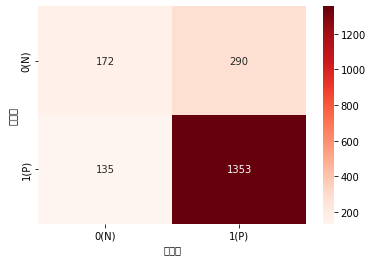

In [87]:
import warnings
warnings.filterwarnings(action='ignore')


import matplotlib.pyplot as plt
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Reds')
plt.xlabel('예측값')
plt.ylabel('실제값')
plt.xticks([0.5,1.5],['0(N)', '1(P)'])
plt.yticks([0.5,1.5],['0(N)', '1(P)'])
plt.show()


In [88]:
pd.DataFrame(cm, index=['실제값(N:0)','실제값(P:1)'],columns=['예측값(N:0)','예측값(P:1)'])


,예측값(N:0),예측값(P:1)
실제값(N:0),172,290
실제값(P:1),135,1353


In [86]:
## 직접 작성
tmp = []
pred = lr.predict(test_scaled)
for i,j in zip(test_y, pred):
  tmp.append(str(int(i))+str(int(j)))
tmpdf=pd.DataFrame({'y':test_y,'y_hat':pred,'실제값/예측값':tmp})
tmpdf.groupby(['실제값/예측값']).count()
#tmpdf.to_csv('re.csv')

,y,y_hat
실제값/예측값,,
00,172,172
01,290,290
10,135,135
11,1353,1353


In [89]:
## 재현율을 높여봅니다.
# predict_proba 분류결정 예측 확률을 반환

pred_proba = lr.predict_proba(test_scaled)
pred  = lr.predict(test_scaled)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,1)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (1950, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.01762421 0.98237579]
 [0.00823836 0.99176164]
 [0.00322809 0.99677191]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.01762421 0.98237579 1.        ]
 [0.00823836 0.99176164 1.        ]
 [0.00322809 0.99677191 1.        ]]


In [90]:
### 코드
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix(y_test, pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    print('오차 행렬')
    print(confusion)
    print(' 정밀도: {0:.4f}, 재현율: {1:.4f}'.format(precision ,recall))
    
    # 리포트 출력
    #cm=confusion_matrix(test_y, lr.predict(test_scaled))


In [91]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold_list = [0.3,0.5,0.8]

for custom_threshold in custom_threshold_list:
    print('------ custom_threshold_list----- %2.1f' % custom_threshold)
    # predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
    pred_proba = lr.predict_proba(test_scaled)
    pred  = lr.predict(test_scaled)

    pred_proba_1 = pred_proba[:,1].reshape(-1,1)

    binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
    custom_predict = binarizer.transform(pred_proba_1)
    custom_predict    
    #get_clf_eval(test_y, )

    
    get_clf_eval(test_y,custom_predict)
    
    #from sklearn.metrics import confusion_matrix


------ custom_threshold_list----- 0.3
오차 행렬
[[  38  424]
 [  40 1448]]
 정밀도: 0.7735, 재현율: 0.9731
------ custom_threshold_list----- 0.5
오차 행렬
[[ 172  290]
 [ 135 1353]]
 정밀도: 0.8235, 재현율: 0.9093
------ custom_threshold_list----- 0.8
오차 행렬
[[412  50]
 [560 928]]
 정밀도: 0.9489, 재현율: 0.6237


In [92]:
# 릿지 라쏘
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV

In [116]:
ridge = Ridge(alpha=0.3)
ridge.fit(train_scaled,train_y)
print(ridge.score(train_scaled,train_y))
print(ridge.score(test_scaled,test_y))

0.22657755551546033
0.17720490788751242


In [97]:
ridge.score(train_scaled,train_y), ridge.score(test_sc)

(0.2264459799884292, 0.17850381431753004)

In [109]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression().fit(train_scaled, train_y)
lr_model.score(train_scaled,train_y)

0.22657755676931224

In [111]:
new_X=np.array([[15,30,1.08]])
newX_scaled = scaler.transform(new_X)
y_hat = ridge.predict(newX_scaled)
# 이 자료의 class 가 1 이면 화이트와인 /0이면 레드와인
classLabel=['red wine','white wine']
y_hat

array([3.36541422])

In [115]:
lasso = Lasso(alpha=0.3)
lasso.fit(train_scaled,train_y)
print(lasso.score(train_scaled,train_y))
print(lasso.score(test_scaled,test_y))

0.0
-0.0009538492436778068
